In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [8]:
import seaborn as sns
sns.set_style("whitegrid")

In [9]:
state = 'AL'

In [10]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)

In [11]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [12]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [13]:
symptoms_dataframe_ri

,listingid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,cj_living_area,fips_code,...,grinder pump,immaculate custom,high efficiency,plenty room roam,neighborhood prattville,letson farms,one of a kind home,adjacent lot,luxury vinyl,spacious secondary bedrooms
0,226801671,202011,2020.0,19300,19300,AL,20201130,335000.0,1868.0,01003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,226026334,202008,2020.0,13820,13820,AL,20200709,191000.0,1450.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,226026939,202008,2020.0,13820,13820,AL,20200710,277000.0,3370.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226937042,202008,2020.0,13820,13820,AL,20200717,555000.0,4478.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,226937313,202008,2020.0,33860,33860,AL,20200803,247000.0,2697.0,01101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206270,10185777,200505,2013.0,13820,13820,AL,20050607,132500.0,1942.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206271,10173838,200508,2013.0,13820,13820,AL,20050715,190500.0,1692.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206272,10190012,200505,2013.0,13820,13820,AL,20050503,198900.0,1578.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206273,10202921,200511,2013.0,13820,13820,AL,20051103,124000.0,1526.0,01073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
symptoms_df['cj_living_area'] = symptoms_dataframe_ri['cj_living_area']
symptoms_df['avmValue'] = symptoms_dataframe_ri['avmValue']

In [15]:
Predictors = symptoms_df.tail(100000).to_numpy()

In [16]:
Predictors.shape

(100000, 2226)

In [17]:
predictand = symptoms_dataframe_ri.tail(100000).avmerror.values

In [18]:
predictand.shape

(100000,)

In [19]:
symptoms_df

,full bath,new stainless steel appliances,main level,beautiful hardwood floors,granite countertops,separate shower,great room,master bedroom,walkin closet,open floor plan,...,high efficiency,plenty room roam,neighborhood prattville,letson farms,one of a kind home,adjacent lot,luxury vinyl,spacious secondary bedrooms,cj_living_area,avmValue
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1868.0,335430.32
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0,202064.90
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3370.0,244981.98
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4478.0,499217.84
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2697.0,271329.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1942.0,123320.98
206271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,196120.00
206272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1578.0,169200.29
206273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1526.0,134330.09


In [20]:
train_samples = 90000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [21]:
from xgboost import XGBRegressor


In [22]:
model = XGBRegressor(max_depth =8)
#model = XGBRegressor(max_depth = 20, eta=0.01)

In [23]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [25]:
y_train.min()

-1.496891489361702

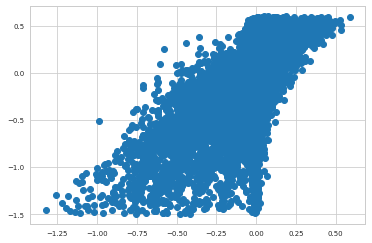

In [26]:
plt.plot(predictions_train,y_train,'o')

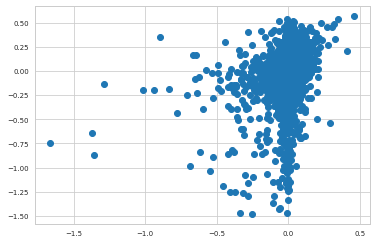

In [27]:
plt.plot(predictions_test,y_test,'o')

In [30]:
df = symptoms_dataframe_ri.tail(100000).copy()


In [31]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [32]:
print(df.head(1)['avmValue'])
print(df.head(1)['Transprice'])
print(df.head(1)['avmerror'])
print(df.head(1)['avmValue']+df.head(1)['avmerror']*df.head(1)['avmValue'])
print((df.head(1)['Transprice']-df.head(1)['avmValue'])/df.head(1)['Transprice'])

106020    190931.8
Name: avmValue, dtype: float64
106020    204000.0
Name: Transprice, dtype: float64
106020    0.06406
Name: avmerror, dtype: float64
106020    203162.85367
dtype: float64
106020    0.06406
dtype: float64


In [33]:
len(predictions_train_value)

90000

In [34]:
df.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

In [35]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.1192712247714547
0.13695804485028307


In [36]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.10312743651885191
0.10608742740772391


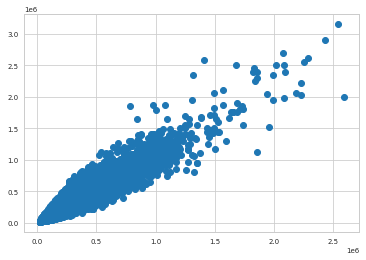

In [37]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [38]:
df.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

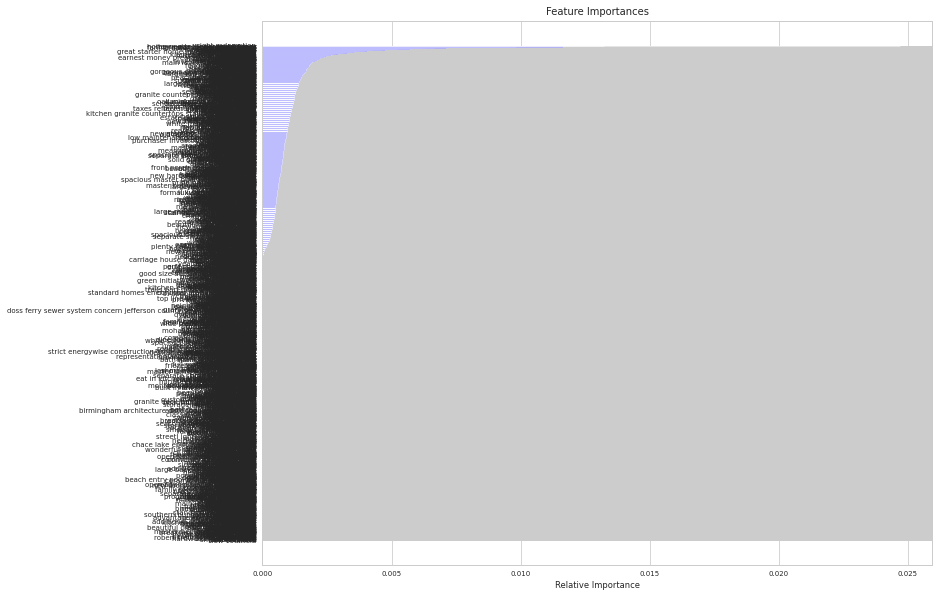

In [39]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = symptoms_df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
for i in indices:
    print(features[i]) 

new counters
cost prepaids
generous size
smooth cooktop
bonus space
hardwood floors kitchen
dont delay
new updates
bedrooms master
bath plan
grand river
robert trent jones golf course
suite bathroom
acre property
new front
high schools
beautiful white cabinets
steam shower
perfect man cave
tub walk closet
new light
main level office
new custom
screened in patio
beautiful tile shower
main bathroom
master bdrm
closets galore
large closets bedrooms
main level boasts
large office
anyall updates
home inspection
cahaba river
large gatherings
breakfast room bay window
ideal home
home disappoint
charm home
master bedroom trey ceilings
great restaurants
long driveway
backyard oasis
open flow
french doors deck
nickel fixtures
convenient uab
new patio
sure impress
huge walk shower
new driveway
lexington park
wood ceilings
house boasts
association fee
double gate
bridle brook
easy access schools
beautiful craftsman style home
golf cart
top line appliances
splash kitchen
additional photos
large den

stone fireplace
great storage
deep water
large open kitchen
center island
kind property
lots charm
additional bedroom
area kids
wine refrigerator
home theater
room kitchen
home price
great counter space
room house
large baths
solid surface countertops
open family room
private guest suite
extensive crown
solid oak cabinets
outdoor fireplace
private retreat
home boasts
item significance
lots windows
huge open deck
new carpet
den fireplace
new low price
new tile
old world style
exterior maintenance
main level bedroom
separate shower double vanity
fresh paint
spacious family room fireplace
subject corp approval
flat lot
pella windows
farm house
new exterior
huge breakfast
agent owner
double convection oven
spanish fort
extra cabinets
interior exterior paint
full fence
additional bonus room
mainlevel garage
lots cabinets
side home
outstanding home
new heat air
measurements approximate
distance park
huge shower
club house
formal areas
interior doors
agents details
quartz countertops
click ph

In [41]:
import joblib
filename = 'XG_newmodel_'+state+'_symptoms_05.sav'
joblib.dump(model,filename)

['XG_newmodel_AL_symptoms_05.sav']

In [42]:
df_to_thu = symptoms_dataframe_ri.tail(100000).head(90000)

In [46]:
df_to_thu['avmValue_ch'] = predictions_train_value

In [49]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df_for_Thu.fea'
df_to_thu.reset_index().to_feather(file_symptoms)

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min_top = \
    noun_sentence_df_final_joined_df_selected_columns_use_min.head(200000)

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min_top = noun_sentence_df_final_joined_df_selected_columns_use_min_top.drop(columns=['level_0'])

In [ ]:
noun_sentence_df_final_joined_df_selected_columns_use_min_top.reset_index().to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_test_3mins.fea')